# Case Study on Loss Given Default

# Context: 
    
CNB Bank deals in all kinds of car loans. Customer first apply for loan after that company validates the customer 
eligibility for loan. In case the borrower doesn’t pay back the loan, the losses are to be incurred by the bank.
LGD stands for Loss given default so it means when a customer at a bank defaults on his loan how much money does the bank lose. 
The customer might have paid some amount back or no amount at all.The bank wants to know if the amount the bank loses can be 
predicted for new customers who apply for a loan from the past data of all defaulters and their pending amounts

# Problem:

The bank wants to automate the loss estimation based on customer detail provided while applying for loan. These details are Age, 
Years of Experience, Number of cars, Gender, Marital Status. To automate this process, they have given a problem to identify the 
loss estimation given that the customers is a defaulter, those are eligible for loan amount so that they get to know what 
features are leading to defaults up to which amount. Here are the details about the data set.

Data:

Variable - Description <br>
Ac_No - The account of customer used as identifier <br>
Age - Age of borrower (16-70) <br>
Years of Experience -  Working experience (0-53) <br>
Number of Cars - Possessed cars (1, 2, 3, 4) <br>
Gender - Male/Female <br>
Married - Married/Single <br>
Loss in Thousands - Target variable <br>


In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline
import statsmodels.formula.api as sm
import scipy, scipy.stats
import math # log function is inside this library
# this is used to get the plots inline i.e. in the same page
from collections import Counter

In /Users/ashish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/ashish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/ashish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/ashish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/ashish/opt/anaconda3/lib/pytho

In [4]:
# read the csv file into a dataframe
df=pd.read_csv("LGD.csv")

In [5]:
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [6]:
# lets do a basic EDA ( exploratory data analysis) on the file
df.info() # this tells us 15290 rows & 7 columns
#df.shape will also give the same info
#df.info also tells us there are no NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ac_No                15290 non-null  int64  
 1   Age                  15290 non-null  int64  
 2   Years of Experience  15290 non-null  int64  
 3   Number of Vehicles   15290 non-null  int64  
 4   Gender               15290 non-null  object 
 5   Married              15290 non-null  object 
 6   Losses in Thousands  15290 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.3+ KB


In [4]:
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ac_No,15290.0,149961.789339,28947.841061,100002.000000,124900.500000,149897.500000,175019.500000,200454.0
Age,15290.0,42.328254,18.280511,16.000000,24.000000,42.000000,61.000000,70.0
Years of Experience,15290.0,23.732897,17.850707,0.000000,6.000000,23.000000,42.000000,53.0
Number of Vehicles,15290.0,2.495880,0.953776,1.000000,2.000000,2.000000,3.000000,4.0
Losses in Thousands,15290.0,389.859718,253.729433,12.534521,226.434217,354.937874,488.676927,3500.0


/Users/ashish/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Losses in Thousands'>

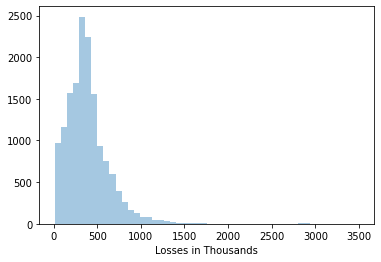

In [7]:
#to plot histograms
sns.distplot(df['Losses in Thousands'],kde=False,bins=50)

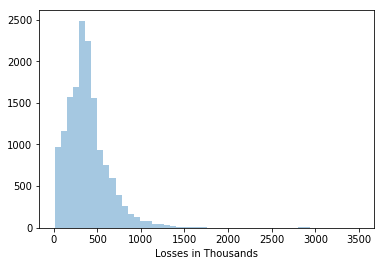

In [ ]:
# this probably means we shud take the log to normalize the data
sns.distplot((df['Losses in Thousands']),kde=False,bins=50)
# map function is used to apply any function on each element of a series/list
# now the distribution looks normal

<AxesSubplot:xlabel='Age'>

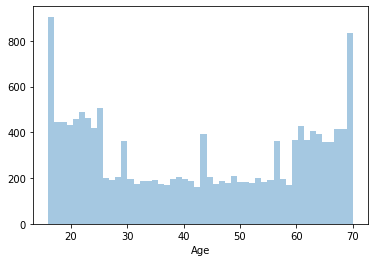

In [8]:
sns.distplot(df['Age'],kde=False,bins=50)

<AxesSubplot:xlabel='Years of Experience', ylabel='Density'>

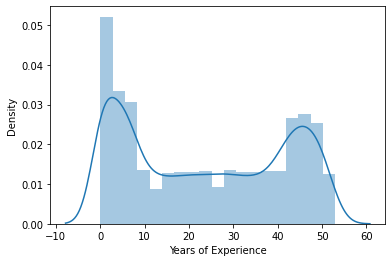

In [7]:
sns.distplot(df['Years of Experience'])

<AxesSubplot:xlabel='Married', ylabel='Losses in Thousands'>

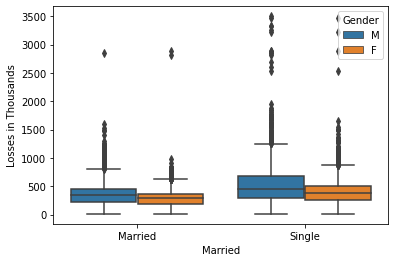

In [11]:
sns.boxplot(x="Married",y="Losses in Thousands",data=df,hue="Gender")
#this shows that sinle ppl & Male are the worst

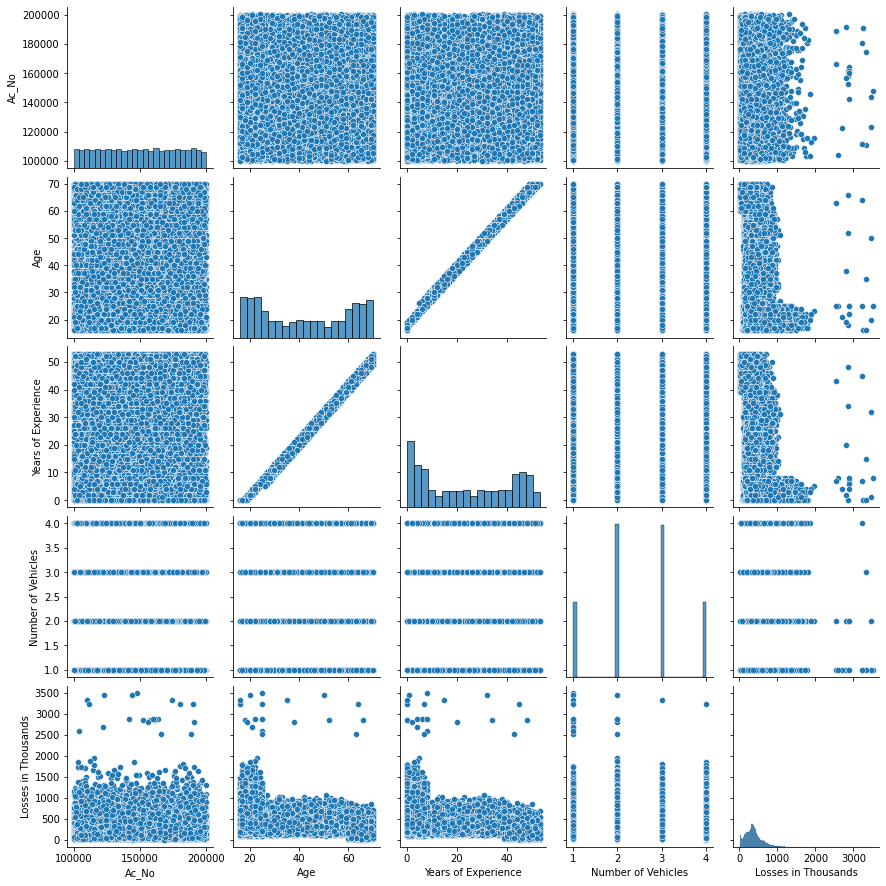

In [12]:
sns.pairplot(df)

In [13]:
df.corr()
# we see a high co-relation between Age and Years of Experience 
# which is obvious as with Age your Experience increases

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands
Ac_No,1.000000,0.008291,0.008437,-0.003056,-0.000794
Age,0.008291,1.000000,0.997161,0.008366,-0.442962
Years of Experience,0.008437,0.997161,1.000000,0.008545,-0.442115
Number of Vehicles,-0.003056,0.008366,0.008545,1.000000,-0.011553
Losses in Thousands,-0.000794,-0.442962,-0.442115,-0.011553,1.000000


In [14]:
# first lets build a simple model with all variables and as is
# we will have to convert the string variables to dummy variables 
dummy_var1=pd.get_dummies(df['Gender'],drop_first=True)
#simillarly for married
dummy_var2=pd.get_dummies(df['Married'],drop_first=True)
dummy_var2.head()
# merge the above 2 dataframe with the original dataframe df
df_new=pd.concat([df,dummy_var1,dummy_var2],axis=1)
df_new.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,M,Single
0,150024,24,5,1,M,Married,203.319595,1,0
1,144880,31,10,1,F,Single,402.197302,0,1
2,133742,56,37,1,M,Married,553.132096,1,0
3,151282,52,31,1,F,Married,292.430579,0,0
4,174407,20,3,1,M,Single,246.540576,1,1


In [15]:
#now we no longer need Married and gender Columns. We will use their
#dummies instead
df_new2=df_new.drop(['Gender','Married'],axis=1)
df_new2.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,M,Single
0,150024,24,5,1,203.319595,1,0
1,144880,31,10,1,402.197302,0,1
2,133742,56,37,1,553.132096,1,0
3,151282,52,31,1,292.430579,0,0
4,174407,20,3,1,246.540576,1,1


In [28]:
#decide your regressor and predictor variables
x=df_new2[["Age","Number of Vehicles","M","Single"]]
y=df_new2["Losses in Thousands"]/1000
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [29]:
x_train.head()

,Age,Number of Vehicles,M,Single
14021,68,4,1,0
10757,49,3,0,0
12299,45,3,0,1
12478,19,3,1,1
3207,36,2,0,0


In [30]:
y_train

14021    0.669104
10757    0.350161
12299    0.340235
12478    0.482276
3207     0.353952
           ...   
905      0.546427
5192     0.484374
12172    0.081871
235      0.355816
13349    0.026680
Name: Losses in Thousands, Length: 10703, dtype: float64

In [31]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
x_train_sd = sd.fit_transform(x_train)
x_test_sd = sd.transform(x_test)

In [32]:
x_train_sd

array([[ 1.392519  ,  1.57878915,  1.01553692, -0.98212736],
       [ 0.35415116,  0.52780145, -0.98470078, -0.98212736],
       [ 0.1355474 ,  0.52780145, -0.98470078,  1.01819788],
       ...,
       [ 0.95531149,  0.52780145, -0.98470078, -0.98212736],
       [-0.8481695 , -1.57417395, -0.98470078,  1.01819788],
       [ 1.50182088,  1.57878915,  1.01553692,  1.01819788]])

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_sd,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lr.score(x_train_sd,y_train)

0.3045506169220349

In [37]:
lr.score(x_test_sd,y_test)

0.2950525754494385

In [36]:
lr.fit(x_train_sd,y_train)
lr.score(x_train_sd,y_train)

0.3045506169220349

In [25]:



from sklearn.linear_model import LinearRegression # import the functions
lm=LinearRegression() #call the function
lm.fit(x_train,y_train)# fit the model
print(lm.intercept_) # see the intercept
print(lm.coef_)# see the betas
#see the error parameters
from sklearn import metrics

#make prediction
pred=lm.predict(x_test)
print(metrics.mean_absolute_error(y_test,pred))
from sklearn.metrics import r2_score
r2_score(y_test, pred)

539.6565230110675
[ -6.14900704  -1.79059246  97.23493268 136.7922503 ]
148.50819212153985


0.29505257544943864

In [ ]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regression_model.score(x_train, y_train)

0.3045506169220349